In [362]:
import pandas as pd
import numpy as np
raw_df = pd.read_csv('HousingData.csv', skiprows=0)
raw_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [363]:
raw_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [364]:
raw_df.fillna(raw_df.mean(), inplace=True)

In [365]:
from scipy.stats import zscore
n_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [366]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split, KFold, cross_val_score
true_target = raw_df['MEDV']
feature = raw_df.drop('MEDV', axis=1)
#6948


X_train, X_test, y_train, y_test = train_test_split(feature, true_target, train_size=0.8, random_state=6948)
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared分數:", r2)

MAPE: 9.0212397068057
RMSE: 2.151139043622757
R-squared分數: 0.9548993249271042


c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_ca

In [367]:
# from sklearn.model_selection import KFold, cross_val_score

# model_kf = XGBRegressor()

# # kf = KFold(n_splits=5, shuffle=True, random_state=6948)

# params = {
#     'objective': 'reg:squarederror',
#     'eval_metric': 'mae'  
# }

# mape_list = []
# rmse_list = []
# r2_list = []
# r2_max = []

# for i in range(401, 1000):
#     kf = KFold(n_splits=5, shuffle=True, random_state=i)
#     scores = cross_val_score(model, feature, true_target, cv=kf, scoring='neg_mean_squared_error')
#     mse_scores = -scores
#     for train_index, test_index in kf.split(feature):
#         X_train, X_test = feature.iloc[train_index], feature.iloc[test_index]
#         y_train, y_test = true_target.iloc[train_index], true_target.iloc[test_index]

#         model = XGBRegressor(**params)
#         model.fit(X_train, y_train)

#         y_pred = model.predict(X_test)

#         # MAPE
#         mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
#         mape_list.append(mape)

#         # RMSE
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         rmse_list.append(rmse)

#         # R2
#         r2 = r2_score(y_test, y_pred)
#         r2_list.append(r2)
#     r2_max.append(np.mean(r2_list))
#     mape_lsit = []
#     rmse_list = []
#     r2_list = []

# r2_maxNum = max(r2_max)
# r2_maxIndex = r2_max.index(r2_maxNum)
# if(r2_maxNum > 0.8845):
#     print('有比較大')
#     print(f'索引: {r2_maxIndex}, 數值: {r2_maxNum}')
# else:
#     print('沒有比較大')
#     print(f'索引: {r2_maxIndex}, 數值: {r2_maxNum}')

In [368]:
from sklearn.model_selection import KFold, cross_val_score

model_kf = XGBRegressor()
#135/0.8845
kf = KFold(n_splits=5, shuffle=True, random_state=135)
scores = cross_val_score(model, feature, true_target, cv=kf, scoring='neg_mean_squared_error')
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae'  
}
mse_scores = -scores
mape_list = []
rmse_list = []
r2_list = []

for train_index, test_index in kf.split(feature):
    X_train1, X_test1 = feature.iloc[train_index], feature.iloc[test_index]
    y_train1, y_test1 = true_target.iloc[train_index], true_target.iloc[test_index]

    model = XGBRegressor(**params)
    model.fit(X_train1, y_train1)

    y_pred = model.predict(X_test1)

    # MAPE
    mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
    mape_list.append(mape)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test1, y_pred))
    rmse_list.append(rmse)

    # R2
    r2 = r2_score(y_test1, y_pred)
    r2_list.append(r2)
for i in range(len(r2_list)):
    print(f'第{i+1}次: MAPE: {mape_list[i]:.2f}%, RMSE: {rmse_list[i]:.4f}, R2: {r2_list[i]:.4f}')
print(f'\n平均績效:')
print(f'Mean MAPE: {np.mean(mape_list):.2f}%, Mean RMSE: {np.mean(rmse_list):.4f}, Mean R2: {np.mean(r2_list):.4f}')

c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_ca

第1次: MAPE: 10.76%, RMSE: 3.0836, R2: 0.8683
第2次: MAPE: 9.56%, RMSE: 2.9152, R2: 0.9167
第3次: MAPE: 12.72%, RMSE: 3.4299, R2: 0.8704
第4次: MAPE: 11.70%, RMSE: 2.9355, R2: 0.9028
第5次: MAPE: 11.12%, RMSE: 3.0410, R2: 0.8641

平均績效:
Mean MAPE: 11.17%, Mean RMSE: 3.0810, Mean R2: 0.8845


c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_ca

In [369]:
feature_importance = model.feature_importances_
print(f'特徵重要性: {feature_importance}')

特徵重要性: [0.02911016 0.00130383 0.01076156 0.0039079  0.04007865 0.46837816
 0.01083755 0.06904507 0.02182611 0.0428028  0.05732355 0.00731164
 0.23731308]


In [370]:
# 選擇最重要的特徵
threshold = 0.03  # 可以根據需要調整閾值
important_features = [i for i, importance in enumerate(feature_importance) if importance > threshold]
print(important_features)

[4, 5, 7, 9, 10, 12]


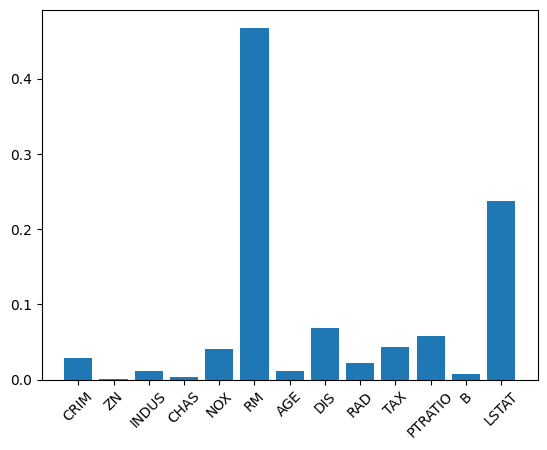

In [371]:

from matplotlib import pyplot as plt
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)

# 手動設置 X 軸標籤
new_labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
plt.xticks(range(len(feature_importance)), n_cols, rotation=45)

plt.show()

In [372]:
columns_to_drop = ['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'B']

X_train = X_train.drop(columns = columns_to_drop, axis=1)
X_test = X_test.drop(columns = columns_to_drop, axis=1)


model3 = XGBRegressor()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'MAPE: {mape:.2f}% RMSE: {rmse}, R2: {r2}')


MAPE: 8.71% RMSE: 2.148749230226642, R2: 0.9549994786826962


c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_ca

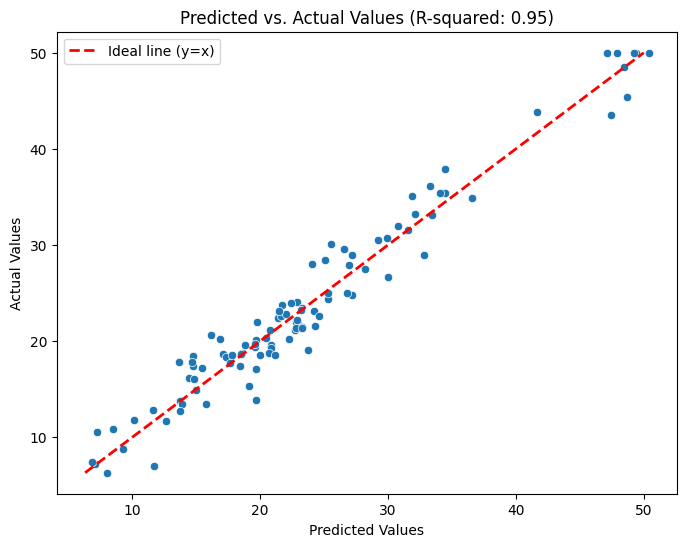

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal line (y=x)')
plt.title(f'Predicted vs. Actual Values (R-squared: {r2:.2f})')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()